In [56]:
import numpy as np
from numpy.random import randint
import matplotlib.pyplot as plt
from enum import Enum
from canvas import Canvas
import time

In [106]:
Action = Enum('Action', 'NOTHING LEFT RIGHT')

class DefaultAgent:
    def __init__(self):
        pass
    
    def select_action(self, game_state, head, fruit) -> Action:
        return Action.NOTHING
    
class SpinAgent:
    def __init__(self):
        self.countdown = 3
    
    def select_action(self, game_state, head, fruit) -> Action:
        if self.countdown > 0:
            self.countdown -= 1
            return Action.NOTHING
        else:
            self.countdown = 3
            return Action.LEFT

In [110]:
class SnakeGame:
    WIDTH  = 20
    HEIGHT = 20
    EMPTY, SNAKE, FRUIT = range(3)
    NORTH, EAST, SOUTH, WEST = range(4)
    
    def __init__(self, agent):
        HEIGHT, WIDTH = SnakeGame.HEIGHT, SnakeGame.WIDTH
        self.state = np.zeros((HEIGHT,WIDTH), dtype = np.uint8)
        point = randint(0,HEIGHT), randint(0,WIDTH)
        self.fruit = point
        while point == self.fruit: point = randint(0,HEIGHT), randint(0,WIDTH)
        self.head = point
        self.snake = [self.head]
        self.state[self.head]  = SnakeGame.SNAKE
        self.state[self.fruit] = SnakeGame.FRUIT
        self.direction = SnakeGame.WEST
        self.score = 0
        self.game_over = False
        self.agent = agent
        
    def interact(self,action):
        if action == Action.LEFT:
            self.direction = (self.direction - 1) % 4
        if action == Action.RIGHT:
            self.direction = (self.direction + 1) % 4
    
    def update(self) -> (): 
        x,y = self.head
        if self.direction == SnakeGame.NORTH:
            self.head = (x-1,y)
        if self.direction == SnakeGame.EAST:
            self.head = (x,y+1)
        if self.direction == SnakeGame.SOUTH:
            self.head = (x+1,y)
        if self.direction == SnakeGame.WEST:
            self.head = (x,y-1)
        
        if not self.in_bounds(self.head):
            self.game_over = True
            return
        
        if self.head == self.fruit:
            self.on_fruit_found()
        
        self.state[self.head]      = SnakeGame.SNAKE
        self.state[self.snake[-1]] = SnakeGame.EMPTY
        
        
        for i in range(1,len(self.snake)):
            self.snake[i] = self.snake[i-1]
        self.snake[0] = self.head
        
        
    def step(self,action):
        self.interact(action)
        self.update()
        
    def play(self, max_steps = 1000):
        steps = 0
        while not self.game_over and steps < max_steps:
            steps += 1
            action = self.agent.select_action(self.state, self.head, self.fruit)
            self.step(action)
            
            yield self.state
            
    def in_bounds(self, tup):
        x,y = tup
        return (0 <= x < self.HEIGHT) and (0 <= y <= self.WIDTH)
        
    def add_snake_part(self):
        self.snake.append(self.snake[-1])
        
    def on_fruit_found(self):
        self.score += 1
        self.add_snake_part()
        
        self.fruit = randint(0,HEIGHT), randint(0,WIDTH)
        while self.state[self.fruit] != self.EMPTY: 
            self.fruit = randint(0,HEIGHT), randint(0,WIDTH)
        
            

def draw(snake_game):
    plt.imshow(snake_game.state)
    

In [111]:
class SnakeDrawer:
    CELL_WIDTH  = 25
    CELL_HEIGHT = 25
    COLOR_MAP = {
        SnakeGame.EMPTY: (238,238,238),
        SnakeGame.SNAKE: (0,255,0),
        SnakeGame.FRUIT: (255,0,0),
    }
    def __init__(self, snake_game):
        self.game = snake_game
        self.canvas = Canvas(
            'snake', 
            width = snake_game.WIDTH * self.CELL_WIDTH,
            height = snake_game.HEIGHT * self.CELL_HEIGHT)
    
    def draw(self, state):
        self.canvas.clear()
        nx = self.CELL_HEIGHT
        ny = self.CELL_WIDTH
        p = 0
        q = 0
        for i in range(0,self.game.HEIGHT):
            q = 0
            for j in range(0,self.game.WIDTH):
                content = state[j,i]
                color   = self.COLOR_MAP[content]
                self.canvas.fill(*color)
                self.canvas.rect(p+1,q+1,nx-2,ny-2)
                q += ny
            p += nx
            
        self.canvas.update()
    
    def run(self):
        for state in game.play():
            self.draw(state)
            time.sleep(0.5)

In [112]:
game = SnakeGame(SpinAgent())
drawer = SnakeDrawer(game)
drawer.run()

KeyboardInterrupt: 

In [92]:
canvas = drawer.canvas

In [45]:
canvas.update()

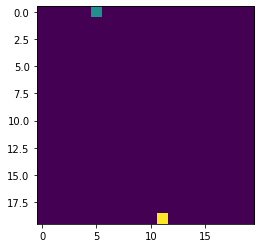

In [85]:
plt.imshow(game.state)